In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

import skimage.io as io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

import os
from tqdm import tqdm
from glob import glob

In [2]:
#导入图像并转化为numpy数组
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 200
label = []
nub_train = len(glob(train_path + '/*.jpg'))
image_data = np.zeros((nub_train,img_size,img_size,3),dtype=np.uint8)

i = 0   
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((img_size,img_size)) #图片resize
    arr = np.asarray(img) #图片转array
    image_data[i, :, :, :] = arr #赋值
    i += 1

for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        label.append(data)
    else :
        label.append('yes_tumor')    
    
    
image_data = np.array(image_data,dtype='float32')/255.0
label = np.array(label)

100%|██████████| 3000/3000 [00:12<00:00, 237.39it/s]


In [3]:
image_data = image_data.reshape(image_data.shape[0],-1)

In [5]:
def PCAPredict(X, k):
    
    pca = PCA(n_components=k)
    X_new = pca.fit_transform(X)  
    #Variance = pca.explained_variance_ratio_
    ncomp = pca.n_components_
    return X_new, ncomp

k1 = 0.95
X_new, ncomp = PCAPredict(image_data,k1)
#print(Variance)
print(ncomp)

765


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_new, label, test_size=0.3, random_state=3)

In [7]:
def KNNClassifier(X_train, y_train, X_test,k):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    Y_pred = neigh.predict(X_test)
    return Y_pred

Y_pred=KNNClassifier(x_train, y_train, x_test,4)

score=metrics.accuracy_score(y_test,Y_pred)
print(score)

0.9066666666666666


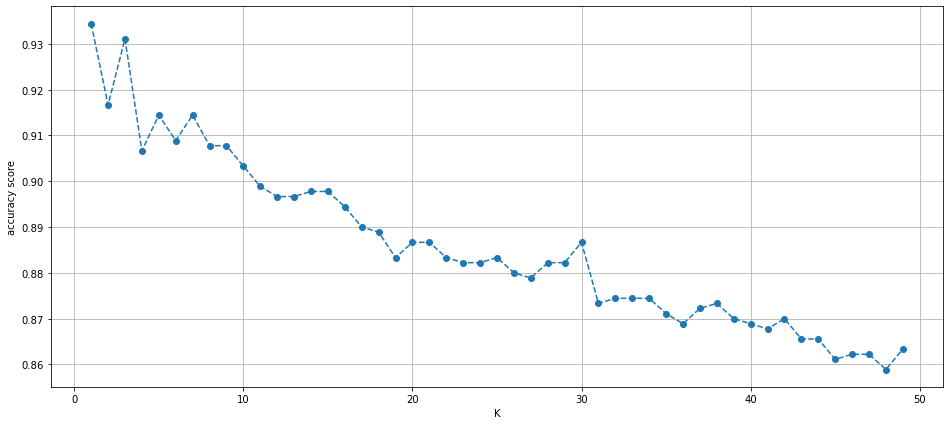

In [10]:
plt.figure(figsize=(16, 7))
plt.xlabel('K')
plt.ylabel('accuracy score')

score_num=[]

for K in range(1,50):
    Y_pred=KNNClassifier(x_train, y_train, x_test,K)
    score=metrics.accuracy_score(y_test,Y_pred)
    score_num.append(score)
    #print(score)
    
plt.plot(range(1,50),score_num,linestyle='--', marker='o')
plt.grid()
plt.show()